# STA2536 -- Tutorial 1

In [7]:
# load packages
import numpy as np # Python libraries for numerical ops
import scipy.stats as st # Python libraries for stats
import matplotlib.pyplot as plt # Python libraries for plotting
from scipy.special import gamma # import the gamma function
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Inverse Transform Method

Let $F(x)$ be a cumulative distribution, and $U \sim  U(0,1)$. Then $F^{-1}(U)$ is distributed as $F$. Indeed,
$$
   P(F^{-1}(U) < x) = P(U < F(x)) = F(x)
$$

The algorithm is as follows: generate realizations of a uniform distribution and plug them in the inverse cumulative distribution function.

---
#### Example 1: Exponential distribution

Recall that $F(x) = 1 - e^{-x/\lambda}$. In this example, we also use the fact that $1-U$ has the same uniform distribution as $U$.

In [8]:
def SimExponential(a, nsims=10000):
    # generate uniform distribution
    U = np.random.uniform(0,1,nsims)
    
    # inverse CDF transform
    Y = -a*np.log(U) # could have used -a*np.log(1-U)
    
    # figure
    x = np.linspace(0,6,100)
    plt.hist(Y, bins=x, label='Histogram')
    plt.plot(x, nsims*np.exp(-x/a)/a*(x[1]-x[0]), linewidth=2, label='Exponential pdf')
    plt.xlabel(r'$x$')
    plt.ylabel(r'Freq.')
    plt.legend()
    plt.show()
    
    return Y

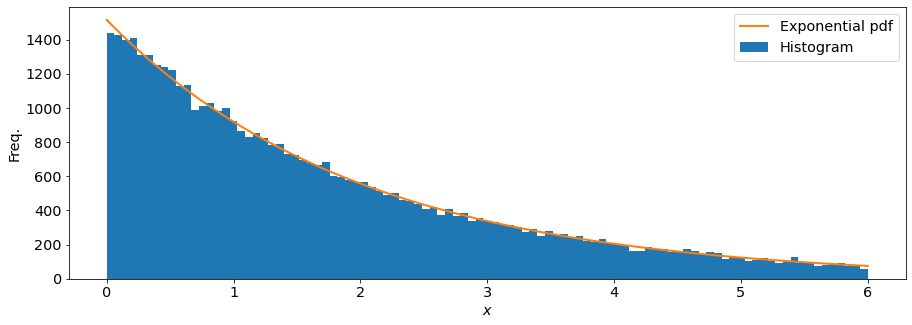

In [9]:
exp_dist = SimExponential(2, 50000)

## Acceptance-Rejection Method

Let $f(x)$ be a pdf, $g(x)$ be another pdf (instrumental distribution) and $c > 0$ such that
$$
\frac{f(x)}{g(x)} \leq c.
$$
Then we can generate realizations from $f$ using the following algorithm:

1. find the constant $c$ that bounds the ratio
2. generate a realization $y$ from the instrumental dist. $g$
3. generate a realization $u$ from a uniform distribution $U(0,1)$
4. IF $u \leq \frac{f(y)}{c g(y)}$, then $x = y$; otherwise repeat step 2.

Indeed, we can show that
$$
P\Big(x | U \leq \frac{f(y)}{c g(y)}\Big) = \frac{P\Big(U \leq \frac{f(y)}{c g(y)} | x\Big) P(x)}{P\Big(U \leq \frac{f(y)}{c g(y)}\Big)} = \frac{P\Big(U \leq \frac{f(y)}{c g(y)} | x\Big) P(x)}{\int_{x} P\Big(U \leq \frac{f(y)}{c g(y)} | x\Big) P(x)} = f(x).
$$

---
#### Example 2: Gamma distribution
Generate realizations from a gamma distribution with parameters $\kappa$ (shape) and $\theta$ (scale), using the exponential distribution with parameter $\kappa \theta$ as an instrumental distribution.

In [10]:
def SimGamma(shape, scale, nsims=10000):
    #f(x): gamma distribution with parameters shape and scale
    #g(x): exponential distribution with parameter (shape*scale)
    
    a = shape*scale
    
    # find the constant c that bounds the ratio f(x)/g(x) (HOMEWORK)
    c = shape**(shape) / gamma(shape) * np.exp(-(shape-1))
    
    # initialize a vector
    Y = np.zeros((nsims,1))
    
    # loop for all realizations
    for i in range(0,nsims):
        
        while True:
            # generate from the instrumental dist.
            y = -a*np.log(np.random.uniform())
            # compute the ratio of densities
            ratio = (1/c) * st.gamma.pdf(y,shape,0,scale) / (np.exp(-y/a)/a)
            
            if np.random.uniform() < ratio:
                break
        
        Y[i] = y
    
    # figure
    x = np.linspace(0,6,100)
    plt.hist(Y, bins=x, label='Histogram')
    plt.plot(x, nsims*(x[1]-x[0])*st.gamma.pdf(x,shape,0,scale), linewidth=2, label='Gamma pdf')
    plt.plot(x, nsims*(x[1]-x[0])*c*np.exp(-x/a)/a, linewidth=2, label='Scaled Exponential pdf')
    plt.xlabel(r'$x$')
    plt.ylabel(r'Freq.')
    plt.legend()
    plt.show()
    
    return Y

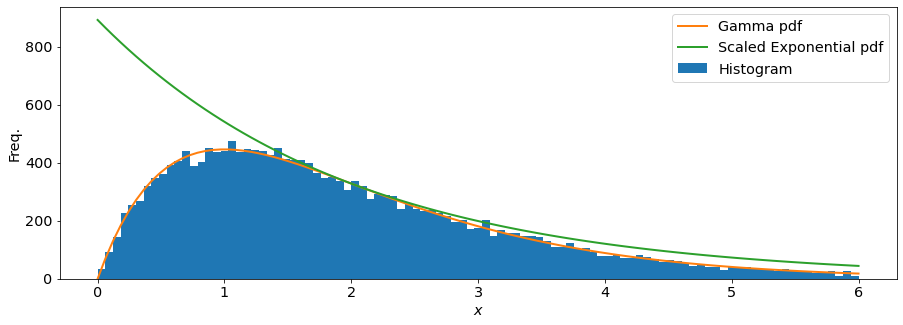

In [11]:
gamma_dist = SimGamma(2,1,20000)